In [1]:
import torch
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import nrrd
import pandas as pd
import os
import sys
import monai

sys.path.append("/mnt/famli_netapp_shared/C1_ML_Analysis/src/famli-ultra-sim/dl/")
sys.path.append("/mnt/famli_netapp_shared/C1_ML_Analysis/src/famli-ultra-sim/dl/nets")

from nets import cut
from loaders.ultrasound_dataset import USDatasetV2
from transforms.ultrasound_transforms import RealUSEvalTransforms

In [2]:
# model_fn = '/mnt/raid/C1_ML_Analysis/train_output/Cut/voluson2butterfly/v0.2/last.ckpt'

# model = cut.CutG.load_from_checkpoint(model_fn).eval()
# x = torch.rand(1, 1, 256, 256)
# model.to_torchscript(file_path="/mnt/famli_netapp_shared/C1_ML_Analysis/src/famli-ultra-sim/trained_models/cutG_v0.2_last.pt", method="trace", example_inputs=x.cuda())

In [3]:
model = torch.jit.load("/mnt/famli_netapp_shared/C1_ML_Analysis/src/famli-ultra-sim/trained_models/cutG_v0.2_last.pt")
model = model.cuda()

In [4]:
df = pd.read_csv('/mnt/raid/C1_ML_Analysis/CSV_files/extract_frames_blind_sweeps_voluson_test_tmp2.csv')
valid_transform = RealUSEvalTransforms()    
test_ds = monai.data.Dataset(data=USDatasetV2(df, mount_point='/mnt/raid/C1_ML_Analysis/', img_column='img_path', transform=valid_transform))
# test_dl = DataLoader(test_ds, batch_size=1, num_workers=args.num_workers, pin_memory=True, shuffle=False)

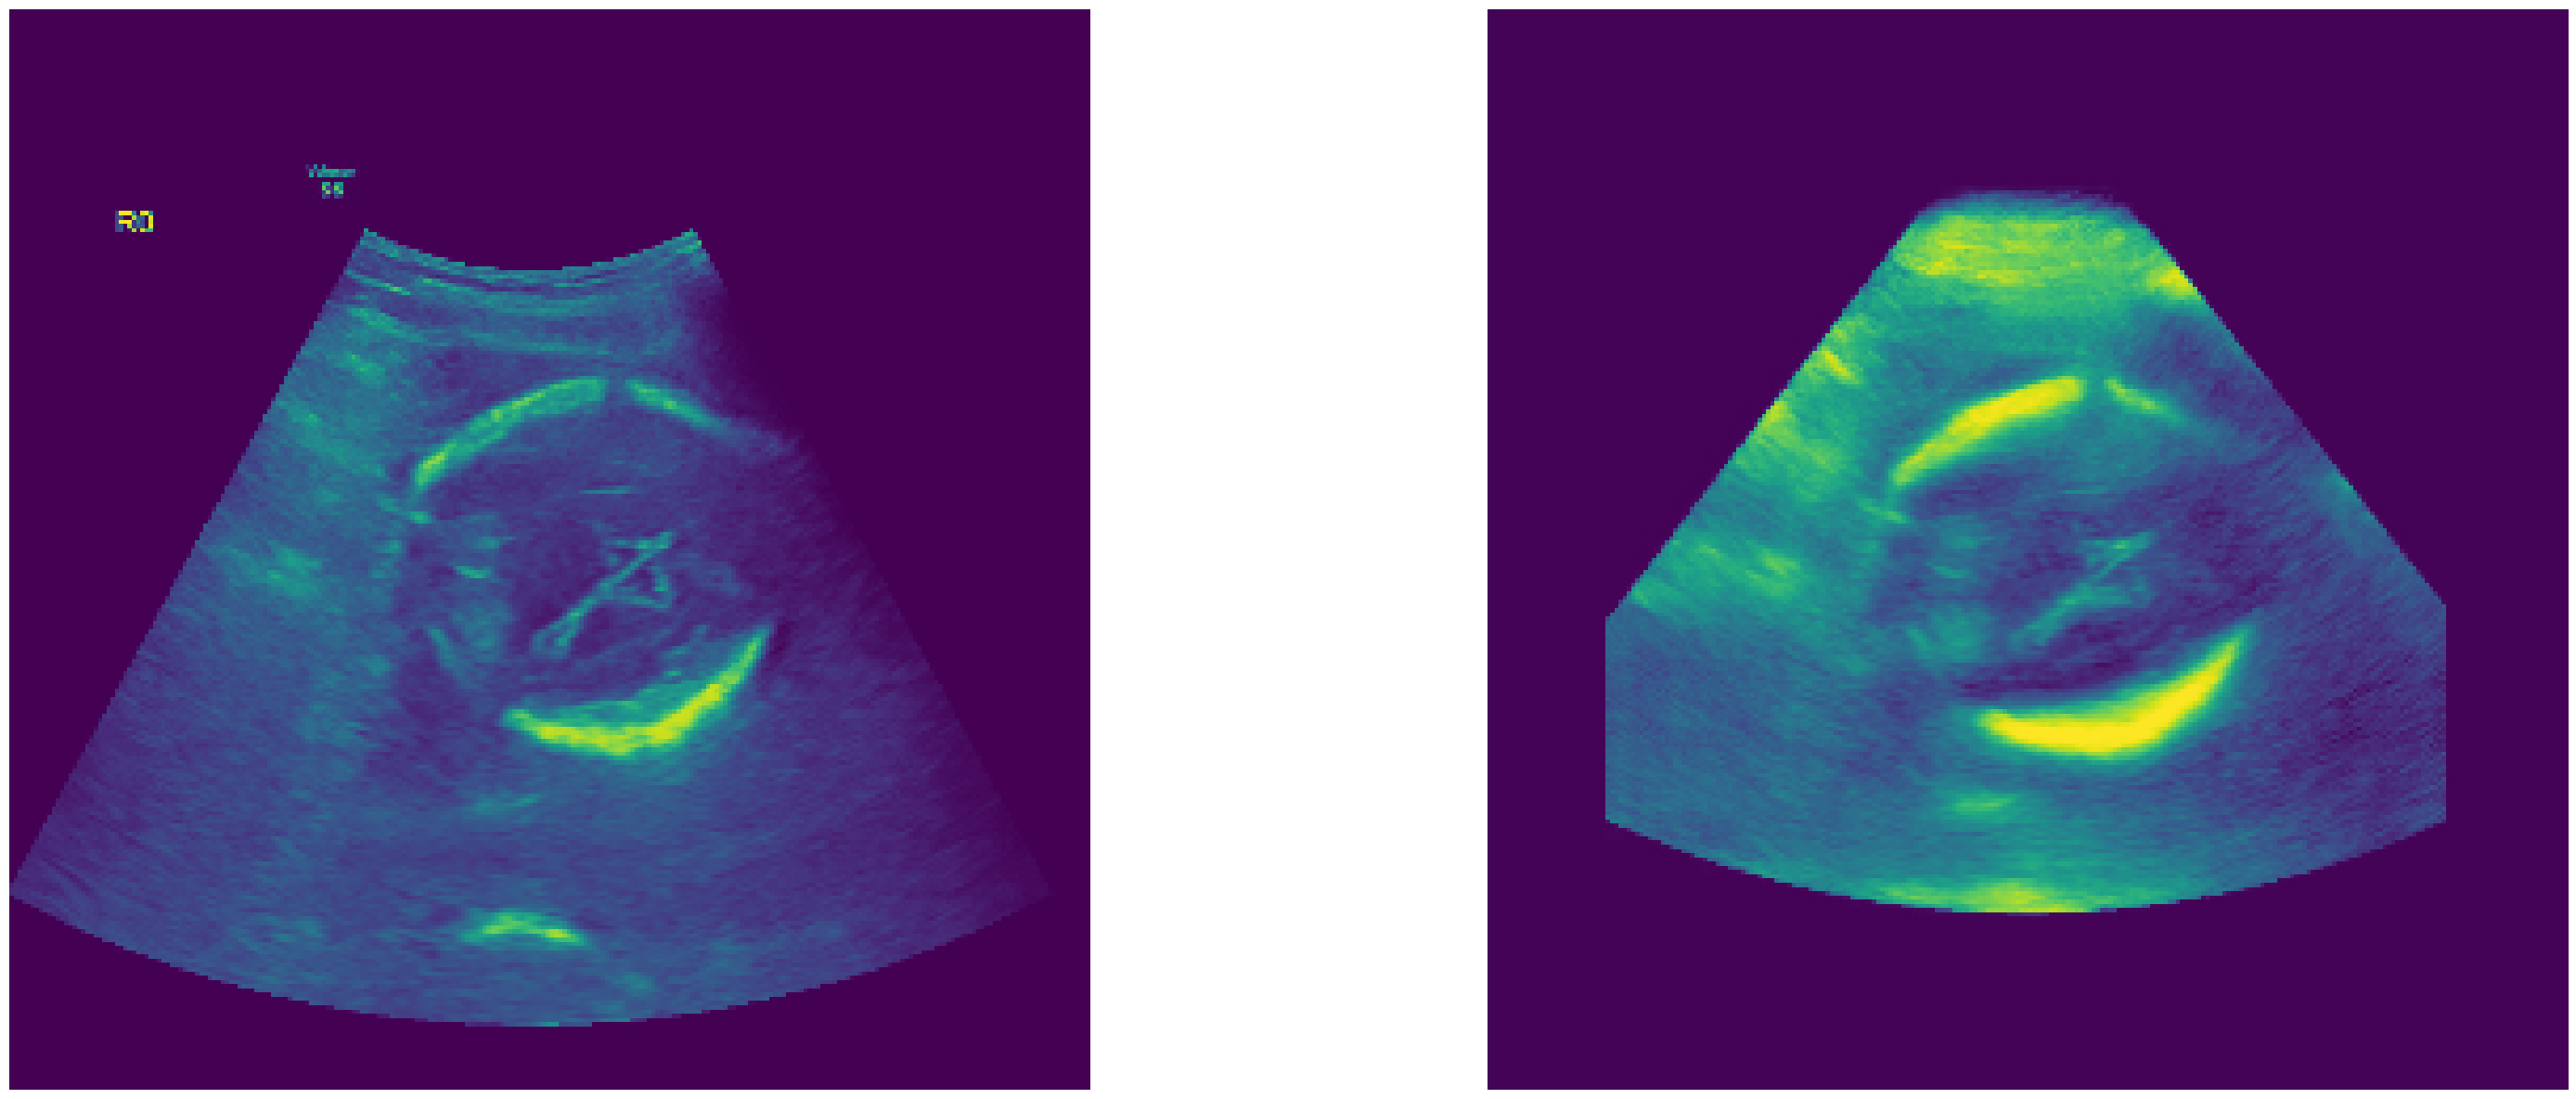

In [5]:
idx = np.random.randint(low=0, high=len(test_ds))
plt.style.use("default")
plt.figure(figsize=(32,24)) # specifying the overall grid size
plt.subplot(221) 
plt.imshow(test_ds[idx].permute(1,2,0).cpu().numpy())
plt.tight_layout()
plt.axis("off")
plt.subplot(222) 
plt.imshow(model(test_ds[idx][None,:].cuda())[0].permute(1,2,0).detach().cpu().numpy())
plt.tight_layout()
plt.axis("off")
plt.show()